In [33]:
#Standard Libraries
import yfinance as yf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from math import sqrt
import os
import functools as ft
import warnings; warnings.simplefilter('ignore')
import time
import datetime as dt

In [34]:
#STW for SPDR S&P/ASX 200 Fund (SPY australian alternative) plus 8 big australian stocks
group1 = ['AAPL','MSFT', 'GOOG', 'AMZN','TSLA', 'BRK-A', 'FB','JNJ','UNH','NVDA','V','XOM','JPM','MA','PG','CVX','WMT','HD','LLY','BAC']
start = dt.date(2016,1,1)
end = dt.date(2021,12,31)
stock_df = yf.download(group1,start,end)
stock_df.tail(10)
# stock_df.info()

[*********************100%***********************]  20 of 20 completed


Adj Close                                               \
                  AAPL        AMZN        BAC     BRK-A         CVX   
Date                                                                  
2021-12-15  178.809143  173.315002  43.475796  443702.0  113.426208   
2021-12-16  171.788391  168.871002  44.524597  454550.0  114.486275   
2021-12-17  170.671463  170.017502  43.416431  443304.0  111.502411   
2021-12-20  169.285278  167.078995  42.704037  437445.0  111.551483   
2021-12-21  172.516403  170.417007  43.723152  443000.0  113.337883   
2021-12-22  175.159149  171.037003  43.812202  444588.0  113.985687   
2021-12-23  175.797394  171.068497  43.950722  444654.0  114.260521   
2021-12-27  179.836319  169.669495  44.168400  447110.0  116.596573   
2021-12-28  178.799164  170.660995  44.227768  449570.0  116.370819   
2021-12-29  178.888916  169.201004  44.158508  452102.0  115.772079   

                                                                         ...  \
                    FB         GOOG          HD         JNJ         JPM  ...   
Date                                                                     ...   
2021-12-15  341.660004  2947.370117  407.809998  168.962692  155.843750  ...   
2021-12-16  334.899994  2896.770020  399.529999  170.808884  158.280975  ...   
2021-12-17  333.790009  2856.060059  387.980011  166.089706  154.679413  ...   
2021-12-20  325.450012  2848.030029  389.399994  165.615814  151.896851  ...   
2021-12-21  334.200012  2884.409912  390.470001  165.082703  154.018311  ...   
2021-12-22  330.450012  2938.979980  395.640015  165.793518  154.620209  ...   
2021-12-23  335.239990  2942.850098  397.070007  166.109451  155.172775  ...   
2021-12-27  346.179993  2961.280029  404.089996  167.511383  156.060837  ...   
2021-12-28  346.220001  2928.959961  406.220001  168.182739  156.534454  ...   
2021-12-29  342.940002  2930.090088  410.839996  169.367462  156.455521  ...   

              Volume                                                   \
                 LLY       MA      MSFT      NVDA        PG      TSLA   
Date                                                                    
2021-12-15  10016700  4918700  35381100  69829700   9152600  25056400   
2021-12-16   5546400  5369900  35034800  70736600  10852900  27590500   
2021-12-17   7582900  5898200  47750300  71375800  24349400  33479100   
2021-12-20   3479400  5013900  28326500  46184700   9202600  18826700   
2021-12-21   2702500  3105100  24740600  52438500   6946000  23839300   
2021-12-22   2721000  3456400  24831500  39518400   6626300  31211400   
2021-12-23   2632200  2627000  19617800  34302200   5640900  30904400   
2021-12-27   1677100  2677100  19947000  40368600   4548600  23715300   
2021-12-28   1033900  1920100  15661500  42059100   5929400  20108000   
2021-12-29   1112300  1535200  15042000  34313900   5346100  18718000   

                                                   
                UNH         V       WMT       XOM  
Date                                               
2021-12-15  4188600  10892500  11163300  19961900  
2021-12-16  4080800   8548400  13023200  21187800  
2021-12-17  5707200  11578400  26193700  44338100  
2021-12-20  3145600   9434400  10339300  21819300  
2021-12-21  2536000   6993700   8206800  19798900  
2021-12-22  1687500   6003400   5676000  14058300  
2021-12-23  1706500   4798200   5864200  13543300  
2021-12-27  1349400   4818400   5346900  12593700  
2021-12-28  1495500   4279800   5261000  12781000  
2021-12-29  1573900   3223100   4348400  12733600  

[10 rows x 120 columns]

In [35]:
#Other option
# !pip install yahoo_fin
# !pip install requests_html

# Advisor Rules

* Risk measure - if beta > avg  it is risky stock
* PE ratio below average = buy
* Div yield above avg = buy
* EPS above avg = buy
* RSI <30 buy, >70 sell
* SP>MA buy

## Fundamental Analysis 

In [36]:
import yahoo_fin.stock_info as si
from datetime import datetime as dt

In [37]:
fundamental_dict={}
now=dt.now()
for ticker in group1:
    print('Getting ', ticker)
    fundamental_dict[ticker]=si.get_quote_table(ticker)
    
print("Data received in ",dt.now()-now)

Getting  AAPL
Getting  MSFT
Getting  GOOG
Getting  AMZN
Getting  TSLA
Getting  BRK-A
Getting  FB
Getting  JNJ
Getting  UNH
Getting  NVDA
Getting  V
Getting  XOM
Getting  JPM
Getting  MA
Getting  PG
Getting  CVX
Getting  WMT
Getting  HD
Getting  LLY
Getting  BAC
Data received in  0:00:44.437696


In [38]:
import pandas as pd

data = pd.DataFrame(fundamental_dict).T

In [39]:
threshold_pe_ratio = data["PE Ratio (TTM)"].quantile(0.75)
threshold_eps = data["EPS (TTM)"].quantile(0.25)
threshold_beta = data["Beta (5Y Monthly)"].mean()

In [40]:
def getdiv(val):
  if val == "N/A (N/A)":
    return 0
  else:
    return float(val.split(" ")[0])

data["NumDiv"] = data["Forward Dividend & Yield"].apply(lambda x: getdiv(x))

<AxesSubplot:ylabel='Density'>

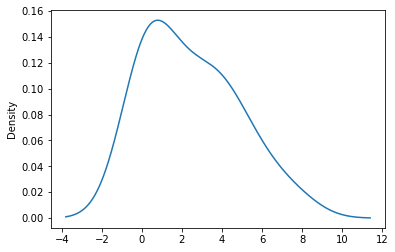

In [41]:
data["NumDiv"].plot(kind = "kde")

In [42]:
threshold_div = data["NumDiv"].quantile(0.50)
threshold_div

2.1

In [43]:
def asset_advise(pe_ratio, eps, forward_div):
  flags = [False, False, False]
  if pe_ratio < threshold_pe_ratio:
    flags[0] = True
  if eps > threshold_eps:
    flags[1] = True
  if forward_div >  threshold_div:
    flags[2] = True
  if all(flags):
    return "Buy"
  else:
    return "Sell"

In [44]:
data["Fundamentals"] = data[["PE Ratio (TTM)","EPS (TTM)","NumDiv"]].apply(lambda x: asset_advise(x["PE Ratio (TTM)"],x["EPS (TTM)"],x["NumDiv"]), axis = 1)

In [45]:
data["Risk"] = data["Beta (5Y Monthly)"].apply(lambda x: "Low Risk" if x < threshold_beta else "High Risk" )

In [46]:
data[["Fundamentals","Risk"]]

,Fundamentals,Risk
AAPL,Sell,High Risk
MSFT,Buy,Low Risk
GOOG,Sell,High Risk
AMZN,Sell,High Risk
TSLA,Sell,High Risk
BRK-A,Sell,Low Risk
FB,Sell,High Risk
JNJ,Buy,Low Risk
UNH,Buy,Low Risk
NVDA,Sell,High Risk


In [47]:
first_reco = data.copy()

In [48]:
# Testing conditionals
# fundamental_dict['AAPL']['Bid']
print('PE ratios*****************')
for key,val in fundamental_dict.items():
    pe_ratio=val['PE Ratio (TTM)']

    if pe_ratio > 20:
        print(key, pe_ratio)

PE ratios*****************
AAPL 23.81
MSFT 28.05
GOOG 21.16
AMZN 59.85
TSLA 96.6
JNJ 23.77
UNH 26.83
NVDA 50.38
V 33.49
MA 37.48
PG 25.4
WMT 26.87
LLY 45.09


In [49]:
#Testing yahoo output
aapl_data = si.get_quote_table('AAPL')
aapl_data

{'1y Target Est': 188.92,
 '52 Week Range': '125.94 - 182.94',
 'Ask': '145.71 x 1400',
 'Avg. Volume': 98129737.0,
 'Beta (5Y Monthly)': 1.2,
 'Bid': '145.64 x 1000',
 "Day's Range": '144.90 - 148.57',
 'EPS (TTM)': 6.14,
 'Earnings Date': 'Jul 25, 2022 - Jul 29, 2022',
 'Ex-Dividend Date': 'May 06, 2022',
 'Forward Dividend & Yield': '0.92 (0.63%)',
 'Market Cap': '2.365T',
 'Open': 147.03,
 'PE Ratio (TTM)': 23.81,
 'Previous Close': 145.38,
 'Quote Price': 146.13999938964844,
 'Volume': 70931362.0}

## RSI Calculation - Technical Analysis

Usually below 30 levels means that the symbol is oversold and above 70 that is overbought. That’s why we can say/predict/guess that it will show us correct timing for the market going UP or DOWN.

In [50]:
import yfinance as yf
import datetime as dt

# Get symbol OHLC data
start = dt.date(2022,5,10)
end = dt.date(2022,5,11)
data = yf.download(group1, start, end, interval = "1m")

# group1 = ['AAPL','MSFT', 'GOOG', 'AMZN','TSLA', 'BRK-A', 'FB','JNJ','UNH','NVDA','V','XOM','JPM','MA','PG','CVX','WMT','HD','LLY','BAC']
# start = dt.date(2016,1,1)
# end = dt.date(2021,12,31)
# stock_df = yf.download(group1,start,end)
# stock_df.tail(10)

# data = yf.download("BTC-USD", start="2021-10-06", end="2021-10-07", interval = "1m")
# group1 instead of btc

[*********************100%***********************]  20 of 20 completed


In [51]:
data

Adj Close                                        \
                                 AAPL         AMZN        BAC         BRK-A   
Datetime                                                                      
2022-05-09 10:00:00-04:00  153.235001  2237.540039  36.840000  476176.71875   
2022-05-09 10:01:00-04:00  153.429993  2240.949951  36.919998  476328.40625   
2022-05-09 10:02:00-04:00  153.309998  2240.250000  36.980000  476459.00000   
2022-05-09 10:03:00-04:00  153.449997  2242.254883  37.025002  477392.75000   
2022-05-09 10:04:00-04:00  153.380005  2239.959961  36.985001  476596.37500   
...                               ...          ...        ...           ...   
2022-05-10 09:56:00-04:00  155.169998          NaN  36.860001  477552.25000   
2022-05-10 09:57:00-04:00  155.223206          NaN  36.840099  477549.15625   
2022-05-10 09:58:00-04:00  155.539993          NaN  36.830002  477236.31250   
2022-05-10 09:59:00-04:00  155.820297          NaN  36.875000  477207.50000   
2022-06-06 16:00:00-04:00  146.139999          NaN  36.150002  468400.00000   

                                                                            \
                                  CVX          FB         GOOG          HD   
Datetime                                                                     
2022-05-09 10:00:00-04:00  164.880005  198.110001  2266.820068  297.000000   
2022-05-09 10:01:00-04:00  165.649994  198.529999  2270.699951  296.950012   
2022-05-09 10:02:00-04:00  165.729996  198.848602  2273.419922  296.929993   
2022-05-09 10:03:00-04:00  165.839996  198.779999  2272.060059  297.290009   
2022-05-09 10:04:00-04:00  165.330002  198.698898  2272.389893  296.339996   
...                               ...         ...          ...         ...   
2022-05-10 09:56:00-04:00  162.699997  198.850006  2309.760010  295.859985   
2022-05-10 09:57:00-04:00  162.990005  199.104996  2310.030029  294.609985   
2022-05-10 09:58:00-04:00  163.160004  199.395004  2316.689941  294.315002   
2022-05-10 09:59:00-04:00  163.139999  199.520004  2317.679932  296.230011   
2022-06-06 16:00:00-04:00  176.830002  194.250000  2340.209961  303.890015   

                                                   ...   Volume         \
                                  JNJ         JPM  ...      LLY     MA   
Datetime                                           ...                   
2022-05-09 10:00:00-04:00  175.429993  122.334999  ...      0.0      0   
2022-05-09 10:01:00-04:00  175.490005  122.529999  ...   5117.0  24221   
2022-05-09 10:02:00-04:00  175.509995  122.706497  ...   8009.0  13105   
2022-05-09 10:03:00-04:00  175.500000  122.889999  ...  14104.0  10618   
2022-05-09 10:04:00-04:00  175.356705  122.639999  ...   4678.0   9817   
...                               ...         ...  ...      ...    ...   
2022-05-10 09:56:00-04:00  178.289993  122.599998  ...   7307.0  13071   
2022-05-10 09:57:00-04:00  178.089996  122.735001  ...   6897.0  23338   
2022-05-10 09:58:00-04:00  177.919998  122.779999  ...   9782.0  40296   
2022-05-10 09:59:00-04:00  177.970001  122.879997  ...  12292.0  57998   
2022-06-06 16:00:00-04:00  176.399994  129.729996  ...      0.0      0   

                                                                          \
                             MSFT    NVDA       PG    TSLA    UNH      V   
Datetime                                                                   
2022-05-09 10:00:00-04:00       0       0      0.0       0      0      0   
2022-05-09 10:01:00-04:00  192737  195755  15151.0   70223  11027  35332   
2022-05-09 10:02:00-04:00  173467  158903  10873.0   94324  10865  16514   
2022-05-09 10:03:00-04:00  110495  131391  12267.0   46691   5864  10392   
2022-05-09 10:04:00-04:00  121520  136115  14091.0   87972   5428  32939   
...                           ...     ...      ...     ...    ...    ...   
2022-05-10 09:56:00-04:00  100083  301470      NaN   74862   7807  39422   
2022-05-10 09:57:00-04:00  1026

In [52]:
def RSI(data, window=14, adjust=False):
    delta = data['Close'].diff(1).dropna()
    loss = delta.copy()
    gains = delta.copy()

    gains[gains < 0] = 0
    loss[loss > 0] = 0

    gain_ewm = gains.ewm(com=window - 1, adjust=adjust).mean()
    loss_ewm = abs(loss.ewm(com=window - 1, adjust=adjust).mean())

    RS = gain_ewm / loss_ewm
    RSI = 100 - 100 / (1 + RS)

    return RSI

In [53]:
#!pip install ta-lib
#!pip freeze
import talib

In [54]:
reversed_df = data.iloc[::-1]
taout = map(lambda x: talib.RSI(reversed_df["Close"][x], 14), reversed_df["Close"])


In [55]:
ta_data_out = {}
for idx,tadat in enumerate(taout):
  ta_data_out[reversed_df["Close"].columns[idx]] = tadat

In [56]:
set(ta_data_out.keys()) 

{'AAPL',
 'AMZN',
 'BAC',
 'BRK-A',
 'CVX',
 'FB',
 'GOOG',
 'HD',
 'JNJ',
 'JPM',
 'LLY',
 'MA',
 'MSFT',
 'NVDA',
 'PG',
 'TSLA',
 'UNH',
 'V',
 'WMT',
 'XOM'}

In [65]:
for stock in first_reco.index:
  ta_val = ta_data_out[stock].resample("d").mean().dropna().iloc[0]
  if ta_val < 50:
    first_reco.loc[stock, "RSI Reco"] = "Buy"
  else:
    first_reco.loc[stock, "RSI Reco"] = "Sell"

In [66]:
first_reco[["Fundamentals","RSI Reco"]]

,Fundamentals,RSI Reco
AAPL,Sell,Sell
MSFT,Buy,Sell
GOOG,Sell,Buy
AMZN,Sell,Sell
TSLA,Sell,Sell
BRK-A,Sell,Sell
FB,Sell,Sell
JNJ,Buy,Buy
UNH,Buy,Sell
NVDA,Sell,Sell


In [67]:
reversed_df["Close"]["AMZN"]

Datetime
2022-06-06 16:00:00-04:00            NaN
2022-05-10 09:59:00-04:00            NaN
2022-05-10 09:58:00-04:00            NaN
2022-05-10 09:57:00-04:00            NaN
2022-05-10 09:56:00-04:00            NaN
                                ...     
2022-05-09 10:04:00-04:00    2239.959961
2022-05-09 10:03:00-04:00    2242.254883
2022-05-09 10:02:00-04:00    2240.250000
2022-05-09 10:01:00-04:00    2240.949951
2022-05-09 10:00:00-04:00    2237.540039
Name: AMZN, Length: 391, dtype: float64

## SMA Calculation - Technical Analysis

A simple moving average smooths out volatility and makes it easier to view the price trend of a security. If the simple moving average points up, this means that the security's price is increasing. If it is pointing down, it means that the security's price is decreasing.

In [68]:
#df['MA'] = ta.SMA(df['Close'],20)

smaout = map(lambda x: talib.SMA(reversed_df["Close"][x], 20), reversed_df["Close"])

In [69]:
#next(smaout)

sma_data_out = {}
for idx,smadat in enumerate(smaout):
  sma_data_out[reversed_df["Close"].columns[idx]] = smadat

In [71]:
for stock in first_reco.index:
  sma_cond = reversed_df["Close"][stock].resample("d").last().iloc[0] > sma_data_out[stock].resample("d").last().iloc[0]
  if sma_cond:
    first_reco.loc[stock, "SMA Reco"] = "Buy"
  else:
    first_reco.loc[stock, "SMA Reco"] = "Sell"

In [81]:
reco = first_reco[["Fundamentals","RSI Reco", "SMA Reco"]]


reco_r = first_reco[["Fundamentals","RSI Reco", "SMA Reco","Risk"]]
reco_r

,Fundamentals,RSI Reco,SMA Reco,Risk
AAPL,Sell,Sell,Sell,High Risk
MSFT,Buy,Sell,Sell,Low Risk
GOOG,Sell,Buy,Sell,High Risk
AMZN,Sell,Sell,Buy,High Risk
TSLA,Sell,Sell,Sell,High Risk
BRK-A,Sell,Sell,Sell,Low Risk
FB,Sell,Sell,Sell,High Risk
JNJ,Buy,Buy,Sell,Low Risk
UNH,Buy,Sell,Sell,Low Risk
NVDA,Sell,Sell,Sell,High Risk


In [82]:
reco.to_csv('reco.csv')

In [83]:
reco_r.to_csv('reco_r.csv')